# Kaggle - Shelter Animal Outcomes_7

In [120]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Load Dataset

In [121]:
train = pd.read_csv("data/train.csv")

print(train.shape)

train.head()

(26729, 10)


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [122]:
test = pd.read_csv("data/test.csv")

print(test.shape)

test.head()

(11456, 8)


,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


## EDA and Visualization

### 1. Dates

In [123]:
train["DateTime"] = pd.to_datetime(train["DateTime"])

train["DateTime-year"] = train["DateTime"].dt.year
train["DateTime-month"] = train["DateTime"].dt.month
train["DateTime-day"] = train["DateTime"].dt.day
train["DateTime-hour"] = train["DateTime"].dt.hour
train["DateTime-minute"] = train["DateTime"].dt.minute
train["DateTime-second"] = train["DateTime"].dt.second
train["DateTime-dayofweek"] = train["DateTime"].dt.dayofweek

print(train.shape)

train[["DateTime", "DateTime-year", "DateTime-month", "DateTime-day", "DateTime-hour", "DateTime-minute", "DateTime-second", "DateTime-dayofweek"]].head()

(26729, 17)


,DateTime,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek
0,2014-02-12 18:22:00,2014,2,12,18,22,0,2
1,2013-10-13 12:44:00,2013,10,13,12,44,0,6
2,2015-01-31 12:28:00,2015,1,31,12,28,0,5
3,2014-07-11 19:09:00,2014,7,11,19,9,0,4
4,2013-11-15 12:52:00,2013,11,15,12,52,0,4


### 1-1) 시각화를 하기 전 예상

1. 일단 분(```Dates-minute```), 초(```Dates-second```)는 동물 상태를 판가름하는데 별 영향이 없을 것 같음.
2. 1년에 31일이 있는 달이 절반 정도 밖에 되지 않기 때문에 31일 데이터가 적게 나올것 같음.
3. 반면 시간(```Dates-hour```)은 동물 상태를 판별하는데 큰 영향이 있을 것 같음.

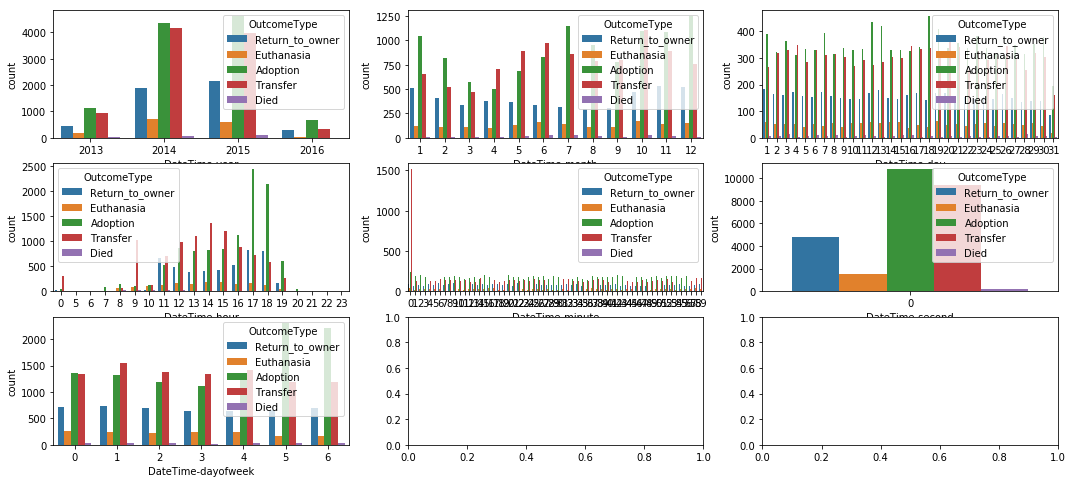

In [124]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x="DateTime-year", hue="OutcomeType", ax=ax1)
sns.countplot(data=train, x="DateTime-month",hue="OutcomeType",  ax=ax2)
sns.countplot(data=train, x="DateTime-day",hue="OutcomeType",  ax=ax3)
sns.countplot(data=train, x="DateTime-hour",hue="OutcomeType",  ax=ax4)
sns.countplot(data=train, x="DateTime-minute",hue="OutcomeType",  ax=ax5)
sns.countplot(data=train, x="DateTime-second",hue="OutcomeType",  ax=ax6)
sns.countplot(data=train, x="DateTime-dayofweek",hue="OutcomeType",  ax=ax7)

### 1-2) 이 시각화로 발견할 수 있는 사실

1. 초(```Dates-second```)는 전부 0으로 기록되어 있어 의미 있는 데이터가 아님. 분(```Dates-minute```)은 0분이 상당히 높다는 것을 알 수 있음.

2. 일(```Dates-day```) 31일을 제외 하면 크게 특징을 보이는 부분이 없음.

3. 시간(```Dates-hour```)을 확인해 보면 세벽시간과 아침시간에는 거의 없으며, 오후시간 혹은 퇴근 시간이 되면서 늘어남.

### 1-3) 예측 모델 계선 가능성

1. 초(```Dates-second```)는 전부 다 0으로 feature 에 포함 시키지 않아도 될것 같음.
2. 시간(```Dates-hour```) 데이터는 예측하는데 도움이 많이 될것 같음.
3. 31일이 있는 달이 1년의 절반 밖에 되지 않기 때문에 이를 참고 하여 학습을 시켜야 할것 같음.

### 2. Breed

### 2-1) 시각화를 하기 전 예상

1. 품종에 따라 사람들이 선호 하는 종이 있을 것임.
2. 많이 변화가 있는 품종이 있을것이며 거의 없는 품종이 있을 것임.

In [125]:
train["Breed"].value_counts()

Domestic Shorthair Mix                                 8810
Pit Bull Mix                                           1906
Chihuahua Shorthair Mix                                1766
Labrador Retriever Mix                                 1363
Domestic Medium Hair Mix                                839
German Shepherd Mix                                     575
Domestic Longhair Mix                                   520
Siamese Mix                                             389
Australian Cattle Dog Mix                               367
Dachshund Mix                                           318
Boxer Mix                                               245
Miniature Poodle Mix                                    233
Border Collie Mix                                       229
Australian Shepherd Mix                                 163
Catahoula Mix                                           157
Rat Terrier Mix                                         157
Jack Russell Terrier Mix                

In [126]:
Breed_list = train["Breed"].value_counts().index

Breed_list

Index(['Domestic Shorthair Mix', 'Pit Bull Mix', 'Chihuahua Shorthair Mix',
       'Labrador Retriever Mix', 'Domestic Medium Hair Mix',
       'German Shepherd Mix', 'Domestic Longhair Mix', 'Siamese Mix',
       'Australian Cattle Dog Mix', 'Dachshund Mix',
       ...
       'Catahoula/American Pit Bull Terrier',
       'Labrador Retriever/American Staffordshire Terrier',
       'Great Pyrenees/Collie Rough',
       'Bluetick Hound/Treeing Walker Coonhound', 'Great Pyrenees/Boxer',
       'Italian Greyhound/Beagle', 'Great Dane/Australian Cattle Dog',
       'Anatol Shepherd/Collie Rough', 'Yorkshire Terrier/Pomeranian',
       'Cocker Spaniel/Toy Poodle'],
      dtype='object', length=1380)

In [127]:
train["Breed(clean)"] = train["Breed"]


train[["Breed", "Breed(clean)"]].head()

,Breed,Breed(clean)
0,Shetland Sheepdog Mix,Shetland Sheepdog Mix
1,Domestic Shorthair Mix,Domestic Shorthair Mix
2,Pit Bull Mix,Pit Bull Mix
3,Domestic Shorthair Mix,Domestic Shorthair Mix
4,Lhasa Apso/Miniature Poodle,Lhasa Apso/Miniature Poodle


In [128]:
Breed_counts = train["Breed(clean)"].value_counts()

Breed_counts

Domestic Shorthair Mix                                 8810
Pit Bull Mix                                           1906
Chihuahua Shorthair Mix                                1766
Labrador Retriever Mix                                 1363
Domestic Medium Hair Mix                                839
German Shepherd Mix                                     575
Domestic Longhair Mix                                   520
Siamese Mix                                             389
Australian Cattle Dog Mix                               367
Dachshund Mix                                           318
Boxer Mix                                               245
Miniature Poodle Mix                                    233
Border Collie Mix                                       229
Australian Shepherd Mix                                 163
Catahoula Mix                                           157
Rat Terrier Mix                                         157
Jack Russell Terrier Mix                

In [129]:
top_Breed_counts = Breed_counts[Breed_counts >= 11]
top_Breed_counts = top_Breed_counts.index

print(len(top_Breed_counts.shape))
top_Breed_counts

1


Index(['Domestic Shorthair Mix', 'Pit Bull Mix', 'Chihuahua Shorthair Mix',
       'Labrador Retriever Mix', 'Domestic Medium Hair Mix',
       'German Shepherd Mix', 'Domestic Longhair Mix', 'Siamese Mix',
       'Australian Cattle Dog Mix', 'Dachshund Mix',
       ...
       'Beauceron Mix', 'Basenji Mix', 'Chihuahua Shorthair/Yorkshire Terrier',
       'Akita Mix', 'Standard Poodle Mix', 'Pug/Beagle', 'Bulldog Mix',
       'German Shepherd/Siberian Husky', 'Ragdoll Mix',
       'Siberian Husky/German Shepherd'],
      dtype='object', length=181)

In [130]:
train.loc[~train["Breed(clean)"].isin(top_Breed_counts), "Breed(clean)"] = "Others"

print(train.shape)
train[["Breed", "Breed(clean)"]].head()

(26729, 18)


,Breed,Breed(clean)
0,Shetland Sheepdog Mix,Shetland Sheepdog Mix
1,Domestic Shorthair Mix,Domestic Shorthair Mix
2,Pit Bull Mix,Pit Bull Mix
3,Domestic Shorthair Mix,Domestic Shorthair Mix
4,Lhasa Apso/Miniature Poodle,Others


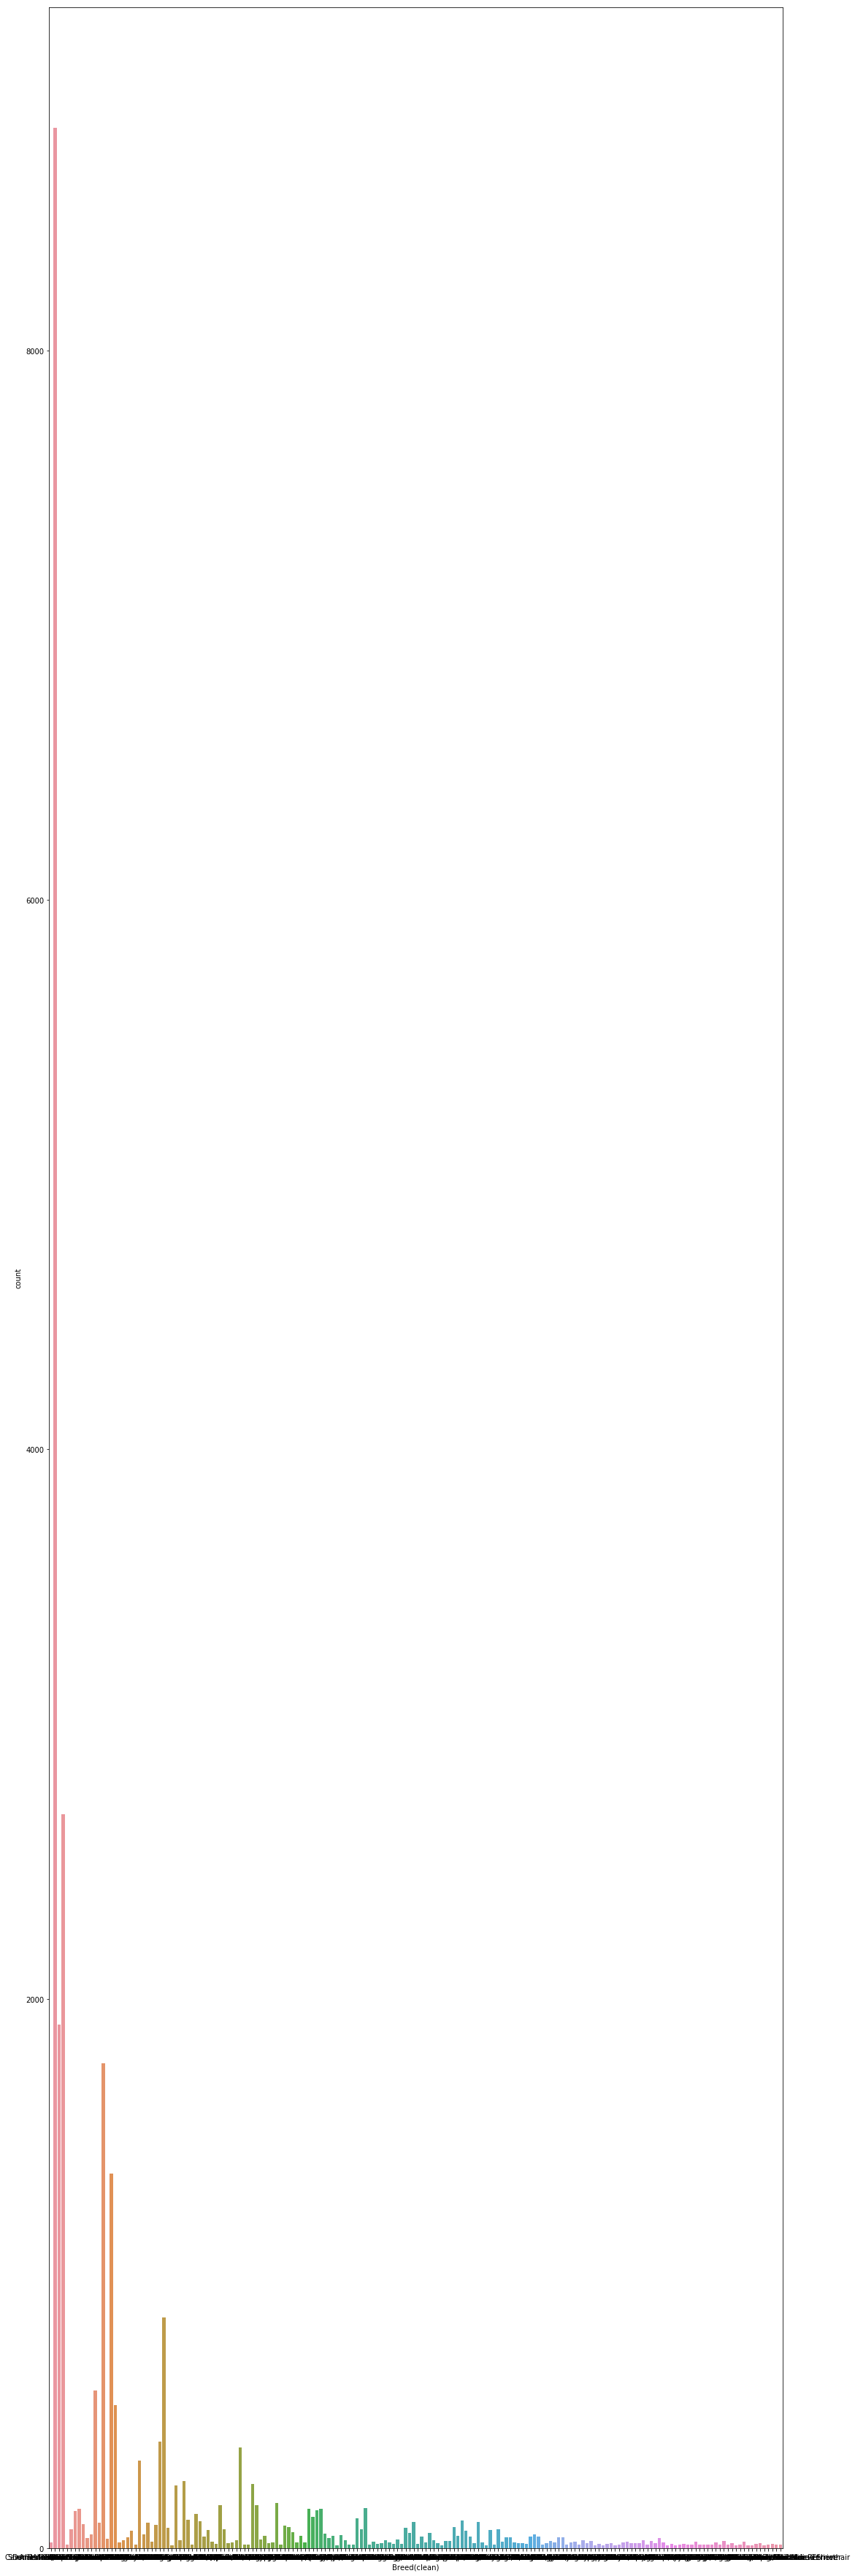

In [131]:
plt.figure(figsize = (18, 64))

sns.countplot(data=train, x="Breed(clean)")

### 2-2) 이 시각화로 발견할 수 있는 사실

1. 품종이 너무나도 다양하며 (1380 종), 1건만 있는 품종도 상당히 많다는 것을 알 수 있음 

2. 1건만 있는 품종을 아웃라이어로 잡고 다시 확인하는 것이 필요함

### 2-3) 예측 모델 계선 가능성

1. 1건만 있는 품종을 처리를 한 이후에 예측을 해야 도움이 될 것 같음.

### 3. Color

### 3-1) 시각화를 하기 전 예상

1. 색에 따라 사람들이 선호 하는 색이 있을 것임.
2. 많이 변화가 있는 색이 있을것이며 거의 없는 색이 있을 것임.

In [132]:
train["Color"].value_counts()

Black/White                  2824
Black                        2292
Brown Tabby                  1635
Brown Tabby/White             940
White                         931
Brown/White                   884
Orange Tabby                  841
Tan/White                     773
Tricolor                      752
Blue/White                    702
Black/Tan                     672
White/Black                   643
Brown                         639
Tan                           628
White/Brown                   569
Tortie                        530
Calico                        517
Orange Tabby/White            455
Blue                          450
Brown Brindle/White           450
Black/Brown                   436
Blue Tabby                    433
White/Tan                     389
Red                           337
Torbie                        335
Brown/Black                   333
Red/White                     331
Blue Tabby/White              241
Brown Brindle                 232
Chocolate/Whit

In [133]:
train["Color(clean)"] = train["Color"]


train[["Color", "Color(clean)"]].head()

,Color,Color(clean)
0,Brown/White,Brown/White
1,Cream Tabby,Cream Tabby
2,Blue/White,Blue/White
3,Blue Cream,Blue Cream
4,Tan,Tan


In [134]:
Color_lists = train["Color(clean)"].value_counts()

Color_lists

Black/White                  2824
Black                        2292
Brown Tabby                  1635
Brown Tabby/White             940
White                         931
Brown/White                   884
Orange Tabby                  841
Tan/White                     773
Tricolor                      752
Blue/White                    702
Black/Tan                     672
White/Black                   643
Brown                         639
Tan                           628
White/Brown                   569
Tortie                        530
Calico                        517
Orange Tabby/White            455
Blue                          450
Brown Brindle/White           450
Black/Brown                   436
Blue Tabby                    433
White/Tan                     389
Red                           337
Torbie                        335
Brown/Black                   333
Red/White                     331
Blue Tabby/White              241
Brown Brindle                 232
Chocolate/Whit

In [135]:
top_Color_lists = Color_lists[Color_lists >= 11]
top_Color_lists = top_Color_lists.index

print(top_Color_lists.shape)

top_Color_lists

(127,)


Index(['Black/White', 'Black', 'Brown Tabby', 'Brown Tabby/White', 'White',
       'Brown/White', 'Orange Tabby', 'Tan/White', 'Tricolor', 'Blue/White',
       ...
       'Brown/Tricolor', 'White/White', 'Sable/Black', 'Gray/Tan',
       'Tricolor/Black', 'Blue Tick/Black', 'Blue Cream', 'Tan/Silver',
       'Buff/Tan', 'Liver/White'],
      dtype='object', length=127)

In [136]:
train.loc[~train["Color(clean)"].isin(top_Color_lists), "Color(clean)"] = "Others"

print(train.shape)
train[["Color", "Color(clean)"]].head()

(26729, 19)


,Color,Color(clean)
0,Brown/White,Brown/White
1,Cream Tabby,Cream Tabby
2,Blue/White,Blue/White
3,Blue Cream,Blue Cream
4,Tan,Tan


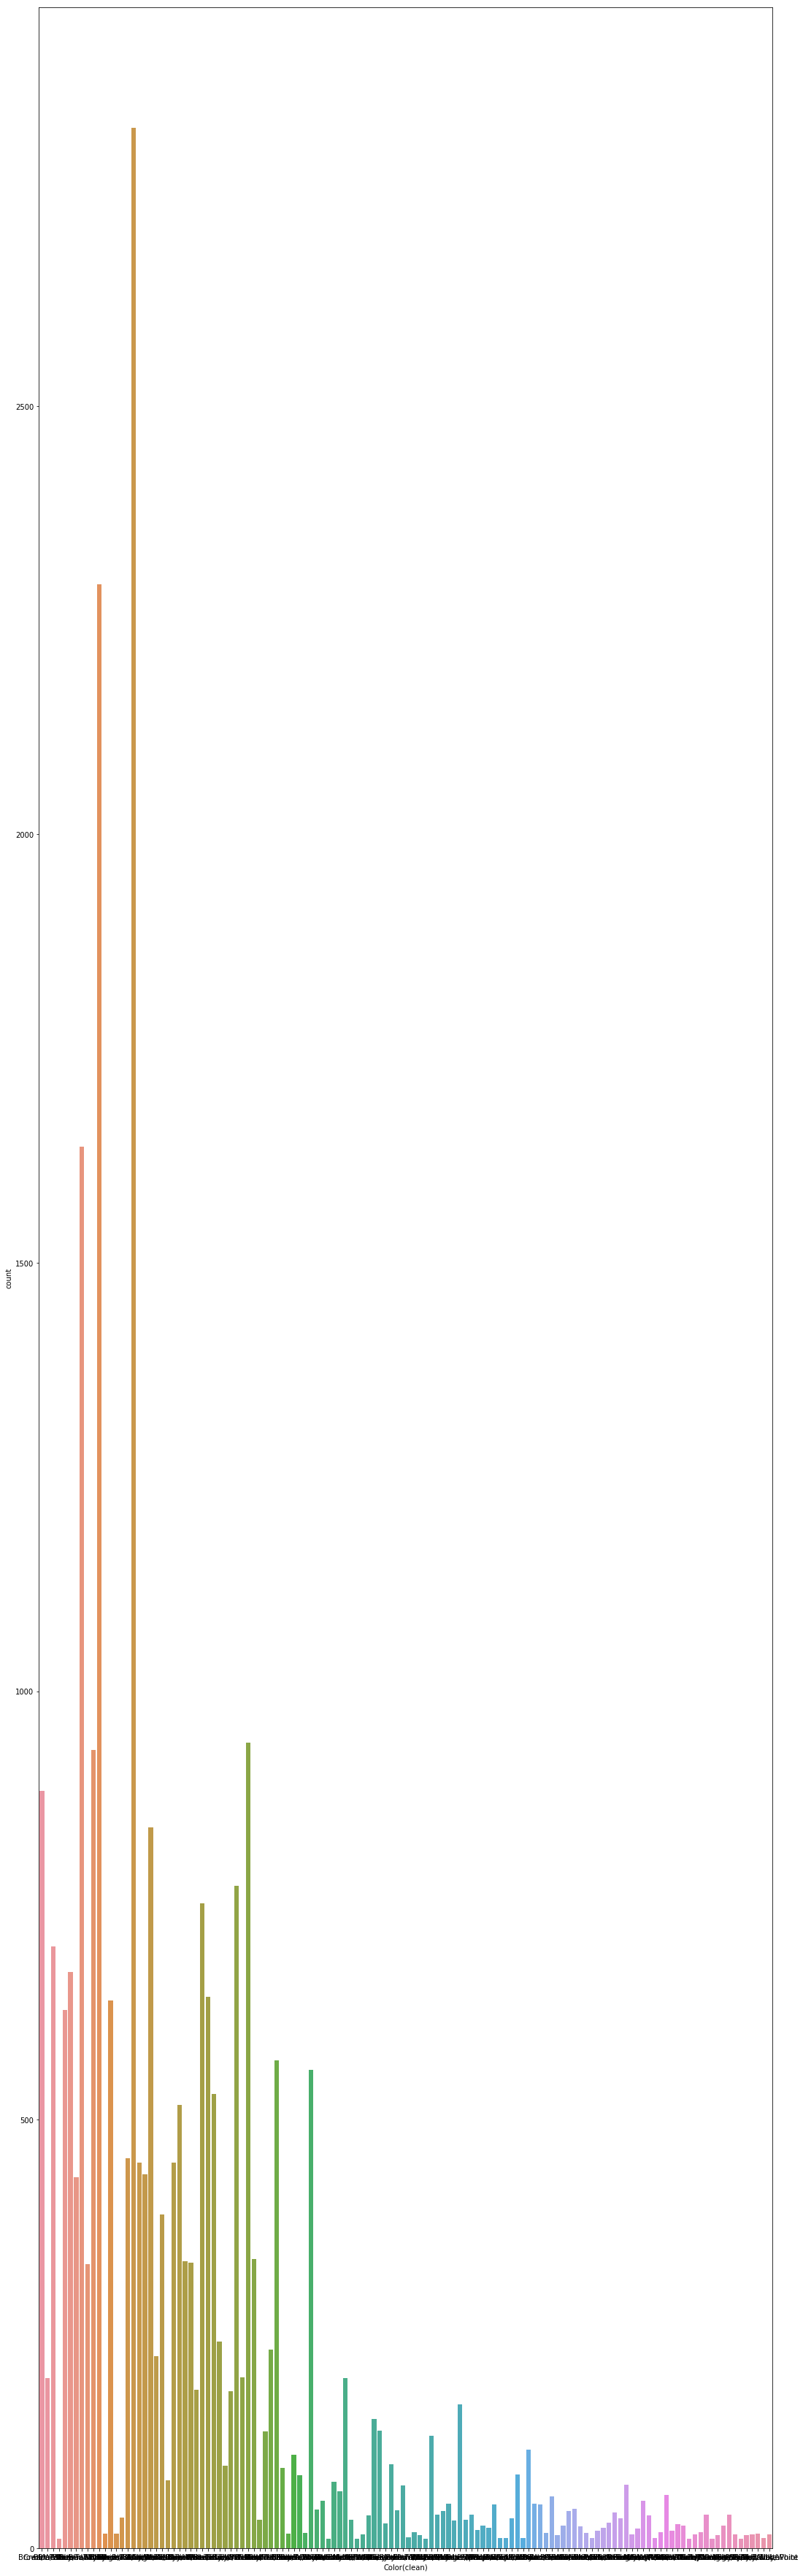

In [137]:
plt.figure(figsize = (18, 64))

sns.countplot(data=train, x="Color(clean)")

### 3-2) 이 시각화로 발견할 수 있는 사실

1. 색이 다양하며 (366 종), 1건만 있는 색상도 상당히 많다는 것을 알 수 있음 

2. 1건만 있는 색상을 아웃라이어로 잡고 다시 확인하는 것이 필요함

### 3-3) 예측 모델 계선 가능성

1. 1건만 있는 색상을 처리를 한 이후에 예측을 해야 도움이 될 것 같음.

### 4. SexuponOutcome

In [138]:
train["SexuponOutcome"].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

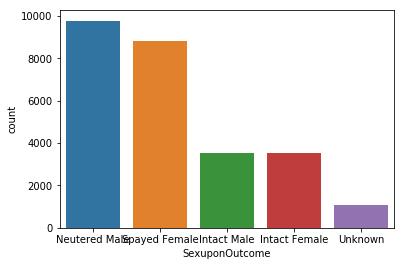

In [139]:
sns.countplot(data=train, x="SexuponOutcome")

### 5. AnimalType

In [140]:
train["AnimalType"].value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

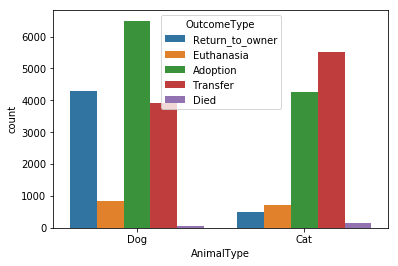

In [141]:
sns.countplot(data=train, x="AnimalType", hue = "OutcomeType")

### 6. Name

In [189]:
train["Name"].value_counts()

Max            136
Bella          135
Charlie        107
Daisy          106
Lucy            94
Buddy           87
Princess        86
Rocky           85
Luna            68
Jack            66
Lola            61
Sadie           58
Shadow          57
Molly           57
Coco            55
Maggie          55
Chico           54
Lily            53
Oreo            53
Blue            52
Lucky           51
Toby            50
Ginger          48
Cookie          48
Lady            47
Sam             46
Duke            45
Milo            44
Sophie          44
Oliver          44
              ... 
Parsley          1
Sprocket         1
Ayo              1
Gringa           1
Prieta           1
Nahti            1
Sugar Baby       1
Little Dog       1
Pogeaux          1
Charlee          1
Billy Goat       1
Goldielux        1
Slava            1
Sugar Sugar      1
Mick Jagger      1
Meggy            1
Chaucer          1
South            1
Yarndi           1
Jimmy Page       1
Coronado         1
Mr Bentley  

In [190]:
test["Name"].value_counts()

Bella         60
Charlie       56
Princess      42
Daisy         42
Luna          40
Rocky         40
Max           38
Lucy          34
Coco          33
Jack          30
Lucky         27
Lola          27
Sadie         25
Molly         25
Blue          25
Pepper        25
Buddy         24
Zeus          24
Chloe         22
Marley        21
Lily          21
Toby          21
Oreo          21
Duke          20
Leo           20
Brownie       19
Sophie        19
Tiger         19
Milo          19
Stella        18
              ..
Sake           1
Ottilia        1
Hondo          1
Elephant       1
Merrilee       1
Hale           1
Rizer          1
Suzie Q        1
Shaun          1
Tinka-Jo       1
Forest         1
Zeffie         1
Dedee          1
Itty Bitty     1
Miriam         1
Dwight         1
Voochie        1
Jobbin         1
Ire            1
Miss Gray      1
Patty          1
Peppo          1
Harriet        1
Tobie          1
Admiral        1
Herrlinda      1
Opal           1
Pauwtucket    

## Reload Dataset

In [142]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek,Breed(clean),Color(clean)
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2014,2,12,18,22,0,2,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13,12,44,0,6,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2015,1,31,12,28,0,5,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11,19,9,0,4,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,12,52,0,4,Others,Tan


In [143]:
test = pd.read_csv("data/test.csv")

print(test.shape)
test.head()

(11456, 8)


,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White


In [144]:
test["DateTime"] = pd.to_datetime(test["DateTime"])

test["DateTime-year"] = test["DateTime"].dt.year
test["DateTime-month"] = test["DateTime"].dt.month
test["DateTime-day"] = test["DateTime"].dt.day
test["DateTime-hour"] = test["DateTime"].dt.hour
test["DateTime-minute"] = test["DateTime"].dt.minute
test["DateTime-second"] = test["DateTime"].dt.second
test["DateTime-dayofweek"] = test["DateTime"].dt.dayofweek

print(test.shape)

test[["DateTime", "DateTime-year", "DateTime-month", "DateTime-day", "DateTime-hour", "DateTime-minute", "DateTime-second", "DateTime-dayofweek"]].head()

(11456, 15)


,DateTime,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek
0,2015-10-12 12:15:00,2015,10,12,12,15,0,0
1,2014-07-26 17:59:00,2014,7,26,17,59,0,5
2,2016-01-13 12:20:00,2016,1,13,12,20,0,2
3,2013-12-28 18:12:00,2013,12,28,18,12,0,5
4,2015-09-24 17:59:00,2015,9,24,17,59,0,3


In [145]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,2015,10,12,12,15,0,0
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,2014,7,26,17,59,0,5
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,2016,1,13,12,20,0,2
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,2013,12,28,18,12,0,5
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,2015,9,24,17,59,0,3


### 1. Breed

In [146]:
train_Breed = pd.get_dummies(train["Breed(clean)"])

print(train_Breed.shape)
train_Breed.head()

(26729, 182)


,Akita Mix,American Bulldog Mix,American Pit Bull Terrier Mix,American Staffordshire Terrier,American Staffordshire Terrier Mix,Anatol Shepherd,Anatol Shepherd Mix,Australian Cattle Dog,Australian Cattle Dog Mix,Australian Cattle Dog/Labrador Retriever,...,Standard Poodle Mix,Standard Schnauzer Mix,Toy Poodle Mix,Weimaraner Mix,West Highland Mix,Whippet Mix,Wire Hair Fox Terrier Mix,Yorkshire Terrier,Yorkshire Terrier Mix,Yorkshire Terrier/Miniature Poodle
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
from scipy.sparse import csr_matrix

train_Breed = csr_matrix(train_Breed)
train_Breed

<26729x182 sparse matrix of type '<class 'numpy.uint8'>'
	with 26729 stored elements in Compressed Sparse Row format>

In [148]:
test["Breed(clean)"] = test["Breed"]

In [149]:
test.loc[~test["Breed(clean)"].isin(top_Breed_counts), "Breed(clean)"] = "Others"

print(test.shape)
test[["Breed", "Breed(clean)"]].head()

(11456, 16)


,Breed,Breed(clean)
0,Labrador Retriever Mix,Labrador Retriever Mix
1,German Shepherd/Siberian Husky,German Shepherd/Siberian Husky
2,Domestic Shorthair Mix,Domestic Shorthair Mix
3,Collie Smooth Mix,Collie Smooth Mix
4,Miniature Poodle Mix,Miniature Poodle Mix


In [150]:
test_Breed = pd.get_dummies(test["Breed(clean)"])

print(test_Breed.shape)
test_Breed.head()

(11456, 182)


,Akita Mix,American Bulldog Mix,American Pit Bull Terrier Mix,American Staffordshire Terrier,American Staffordshire Terrier Mix,Anatol Shepherd,Anatol Shepherd Mix,Australian Cattle Dog,Australian Cattle Dog Mix,Australian Cattle Dog/Labrador Retriever,...,Standard Poodle Mix,Standard Schnauzer Mix,Toy Poodle Mix,Weimaraner Mix,West Highland Mix,Whippet Mix,Wire Hair Fox Terrier Mix,Yorkshire Terrier,Yorkshire Terrier Mix,Yorkshire Terrier/Miniature Poodle
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
test_Breed = csr_matrix(test_Breed)
test_Breed

<11456x182 sparse matrix of type '<class 'numpy.uint8'>'
	with 11456 stored elements in Compressed Sparse Row format>

### 2. Color

In [152]:
train_Color = pd.get_dummies(train["Color(clean)"])

print(train_Color.shape)
train_Color.head()

(26729, 128)


,Apricot,Black,Black Brindle,Black Brindle/White,Black Smoke,Black Smoke/White,Black Tabby,Black Tabby/White,Black/Brown,Black/Brown Brindle,...,White/Orange,White/Orange Tabby,White/Red,White/Tan,White/Tricolor,White/White,Yellow,Yellow Brindle,Yellow Brindle/White,Yellow/White
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
from scipy.sparse import csr_matrix

train_Color = csr_matrix(train_Color)
train_Color

<26729x128 sparse matrix of type '<class 'numpy.uint8'>'
	with 26729 stored elements in Compressed Sparse Row format>

In [154]:
test["Color(clean)"] = test["Color"]

In [155]:
test.loc[~test["Color(clean)"].isin(top_Color_lists), "Color(clean)"] = "Others"

print(test.shape)
test[["Color", "Color(clean)"]].head()

(11456, 17)


,Color,Color(clean)
0,Red/White,Red/White
1,Black/Tan,Black/Tan
2,Brown Tabby,Brown Tabby
3,Tricolor,Tricolor
4,White,White


In [156]:
test_Color = pd.get_dummies(test["Color(clean)"])

print(test_Color.shape)
test_Color.head()

(11456, 128)


,Apricot,Black,Black Brindle,Black Brindle/White,Black Smoke,Black Smoke/White,Black Tabby,Black Tabby/White,Black/Brown,Black/Brown Brindle,...,White/Orange,White/Orange Tabby,White/Red,White/Tan,White/Tricolor,White/White,Yellow,Yellow Brindle,Yellow Brindle/White,Yellow/White
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
test_Color = csr_matrix(test_Color)
test_Color

<11456x128 sparse matrix of type '<class 'numpy.uint8'>'
	with 11456 stored elements in Compressed Sparse Row format>

### 3. SexuponOutcome

In [158]:
train_Sexupon = pd.get_dummies(train["SexuponOutcome"])

print(train_Sexupon.shape)
train_Sexupon.head()

(26729, 5)


,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [159]:
train_Sexupon = csr_matrix(train_Sexupon)

train_Sexupon

<26729x5 sparse matrix of type '<class 'numpy.uint8'>'
	with 26728 stored elements in Compressed Sparse Row format>

In [160]:
test_Sexupon = pd.get_dummies(test["SexuponOutcome"])

print(test_Sexupon.shape)
test_Sexupon.head()

(11456, 5)


,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [161]:
test_Sexupon = csr_matrix(test_Sexupon)

test_Sexupon

<11456x5 sparse matrix of type '<class 'numpy.uint8'>'
	with 11456 stored elements in Compressed Sparse Row format>

In [162]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek,Breed(clean),Color(clean)
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,2014,2,12,18,22,0,2,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2013,10,13,12,44,0,6,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2015,1,31,12,28,0,5,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,2014,7,11,19,9,0,4,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2013,11,15,12,52,0,4,Others,Tan


In [163]:
test.head()

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-minute,DateTime-second,DateTime-dayofweek,Breed(clean),Color(clean)
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White,2015,10,12,12,15,0,0,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan,2014,7,26,17,59,0,5,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby,2016,1,13,12,20,0,2,Domestic Shorthair Mix,Brown Tabby
3,4,Pongo,2013-12-28 18:12:00,Dog,Intact Male,4 months,Collie Smooth Mix,Tricolor,2013,12,28,18,12,0,5,Collie Smooth Mix,Tricolor
4,5,Skooter,2015-09-24 17:59:00,Dog,Neutered Male,2 years,Miniature Poodle Mix,White,2015,9,24,17,59,0,3,Miniature Poodle Mix,White


### 4. AnimalType

In [164]:
train["AnimalType(clear)"] = train["AnimalType"]

train["AnimalType(clear)"].head()

0    Dog
1    Cat
2    Dog
3    Cat
4    Dog
Name: AnimalType(clear), dtype: object

In [165]:
train["AnimalType(clear)"] = train["AnimalType"].replace("Dog", 0).replace("Cat", 1)

train[["AnimalType", "AnimalType(clear)"]].head()

,AnimalType,AnimalType(clear)
0,Dog,0
1,Cat,1
2,Dog,0
3,Cat,1
4,Dog,0


In [166]:
test["AnimalType(clear)"] = test["AnimalType"]

test["AnimalType(clear)"].head()

0    Dog
1    Dog
2    Cat
3    Dog
4    Dog
Name: AnimalType(clear), dtype: object

In [167]:
test["AnimalType(clear)"] = test["AnimalType"].replace("Dog", 0).replace("Cat", 1)

test[["AnimalType", "AnimalType(clear)"]].head()

,AnimalType,AnimalType(clear)
0,Dog,0
1,Dog,0
2,Cat,1
3,Dog,0
4,Dog,0


## Train

In [168]:
feature_name = ["DateTime-year", "DateTime-month", "DateTime-day", "DateTime-hour", "DateTime-dayofweek", "AnimalType(clear)"]

feature_name

['DateTime-year',
 'DateTime-month',
 'DateTime-day',
 'DateTime-hour',
 'DateTime-dayofweek',
 'AnimalType(clear)']

In [169]:
X_train = train[feature_name]

print(X_train.shape)
X_train.head()

(26729, 6)


,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-dayofweek,AnimalType(clear)
0,2014,2,12,18,2,0
1,2013,10,13,12,6,1
2,2015,1,31,12,5,0
3,2014,7,11,19,4,1
4,2013,11,15,12,4,0


In [170]:
X_test = test[feature_name]

print(X_test.shape)
X_test.head()

(11456, 6)


,DateTime-year,DateTime-month,DateTime-day,DateTime-hour,DateTime-dayofweek,AnimalType(clear)
0,2015,10,12,12,0,0
1,2014,7,26,17,5,0
2,2016,1,13,12,2,1
3,2013,12,28,18,5,0
4,2015,9,24,17,3,0


In [171]:
label_name = "OutcomeType"

y_train = train[label_name]

print(y_train.shape)

y_train.head()

(26729,)


0    Return_to_owner
1         Euthanasia
2           Adoption
3           Transfer
4           Transfer
Name: OutcomeType, dtype: object

In [172]:
from scipy.sparse import hstack

X_train = hstack([X_train.astype('float'), train_Breed])
X_train

<26729x188 sparse matrix of type '<class 'numpy.float64'>'
	with 167434 stored elements in COOrdinate format>

In [173]:
X_test = hstack([X_test.astype('float'), test_Breed])
X_test

<11456x188 sparse matrix of type '<class 'numpy.float64'>'
	with 71675 stored elements in COOrdinate format>

In [174]:
X_train = hstack([X_train.astype('float'), train_Color])
X_train

<26729x316 sparse matrix of type '<class 'numpy.float64'>'
	with 194163 stored elements in COOrdinate format>

In [175]:
X_test = hstack([X_test.astype('float'), test_Color])
X_test

<11456x316 sparse matrix of type '<class 'numpy.float64'>'
	with 83131 stored elements in COOrdinate format>

In [176]:
X_train = hstack([X_train.astype('float'), train_Sexupon])
X_train

<26729x321 sparse matrix of type '<class 'numpy.float64'>'
	with 220891 stored elements in COOrdinate format>

In [177]:
X_test = hstack([X_test.astype('float'), test_Sexupon])
X_test

<11456x321 sparse matrix of type '<class 'numpy.float64'>'
	with 94587 stored elements in COOrdinate format>

## Use Gradient Boosting Machine(LightGBM)

In [178]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators = 10,
               random_state = 37)

model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Hyperparameter Tuning

### Coarse Search

In [179]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import log_loss

X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

n_estimators = 100

num_loop = 100

early_stopping_rounds = 20

coarse_hyperparameters_list = []

for loop in range(num_loop):
    learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
    num_leaves = np.random.randint(2, 500)
    max_bin = np.random.randint(2, 500)
    min_child_samples = np.random.randint(2, 500) 
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    model.fit(X_train_kf, y_train_kf,
              eval_set = [(X_test_kf, y_test_kf)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds)

    best_iteration = model.best_iteration_
    score = model.best_score_['valid_0']['multi_logloss']
    
    coarse_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': best_iteration,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37,
        'score': score,
    })

    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")
    
coarse_hyperparameters_list = pd.DataFrame(coarse_hyperparameters_list)

coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = "score")

coarse_hyperparameters_list.head()

 0 best iteration = 100 Score = 1.24439
 1 best iteration = 100 Score = 1.24439
 2 best iteration = 100 Score = 1.24439
 3 best iteration = 100 Score = 1.24425
 4 best iteration = 1 Score = 2.59593
 5 best iteration = 100 Score = 1.15502
 6 best iteration = 100 Score = 1.23751
 7 best iteration = 100 Score = 1.24334
 8 best iteration = 100 Score = 1.21273
 9 best iteration = 100 Score = 1.24278
10 best iteration = 100 Score = 1.11370
11 best iteration = 1 Score = 1.35641
12 best iteration = 100 Score = 1.24418
13 best iteration = 100 Score = 1.24439
14 best iteration = 100 Score = 1.17079
15 best iteration = 100 Score = 1.24439
16 best iteration = 100 Score = 1.24439
17 best iteration = 100 Score = 0.91711
18 best iteration = 100 Score = 1.24228
19 best iteration = 100 Score = 1.24403
20 best iteration = 100 Score = 1.24439
21 best iteration = 100 Score = 1.24089
22 best iteration = 100 Score = 1.24439
23 best iteration = 100 Score = 1.24423
24 best iteration = 100 Score = 1.24245
25 b

,class_type,colsample_bytree,learning_rate,loop,max_bin,min_child_samples,n_estimators,num_leaves,random_state,score,subsample,subsample_freq
73,balanced,0.691837,0.237457,73,366,105,34,371,37,0.894197,0.916747,1
25,balanced,0.933261,0.073494,25,450,215,100,357,37,0.895735,0.974847,1
49,balanced,0.343842,0.093853,49,77,100,100,468,37,0.898918,0.671892,1
55,balanced,0.600711,0.555157,55,208,397,42,70,37,0.914045,0.788220,1
17,balanced,0.332977,0.189538,17,432,399,100,98,37,0.917110,0.508371,1


max bin 70에서 500

subsample 0.5에서 1.0

### Find Search

In [180]:
X_train_kf, X_test_kf, y_train_kf, y_test_kf = \
    train_test_split(X_train, y_train, test_size = 0.3, random_state = 37)

n_estimators = 100

num_loop = 100

early_stopping_rounds = 20

finer_hyperparameters_list = []

for loop in range(num_loop):
    learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
    num_leaves = np.random.randint(2, 500)
    max_bin = np.random.randint(70, 500)
    min_child_samples = np.random.randint(2, 500) 
    subsample = np.random.uniform(low = 0.5, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    model = LGBMClassifier(n_estimators = n_estimators,
                           learning_rate = learning_rate,
                           num_leaves = num_leaves,
                           max_bin = max_bin,
                           min_child_samples = min_child_samples,
                           subsample = subsample,
                           subsample_freq = 1,
                           colsample_bytree = colsample_bytree,
                           class_type = 'balanced',
                           random_state = 37)
    
    model.fit(X_train_kf, y_train_kf,
              eval_set = [(X_test_kf, y_test_kf)],
              verbose = 0,
              early_stopping_rounds = early_stopping_rounds)
    
    best_iteration = model.best_iteration_
    score = model.best_score_['valid_0']['multi_logloss']
    
    finer_hyperparameters_list.append({
        'loop': loop,
        'n_estimators': best_iteration,
        'learning_rate': learning_rate,
        'num_leaves': num_leaves,
        'max_bin': max_bin,
        'min_child_samples': min_child_samples,
        'subsample': subsample,
        'subsample_freq': 1,
        'colsample_bytree': colsample_bytree,
        'class_type': 'balanced',
        'random_state': 37,
        'score': score,
    })

    print(f"{loop:2} best iteration = {best_iteration} Score = {score:.5f}")
    
finer_hyperparameters_list = pd.DataFrame(finer_hyperparameters_list)

finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by = "score")

finer_hyperparameters_list.head()

 0 best iteration = 1 Score = 2.37362
 1 best iteration = 3 Score = 0.93775
 2 best iteration = 100 Score = 1.24435
 3 best iteration = 92 Score = 0.89423
 4 best iteration = 100 Score = 1.24439
 5 best iteration = 100 Score = 1.24438
 6 best iteration = 100 Score = 1.24429
 7 best iteration = 100 Score = 1.23751
 8 best iteration = 100 Score = 1.24439
 9 best iteration = 100 Score = 1.24435
10 best iteration = 100 Score = 0.93519
11 best iteration = 81 Score = 0.90131
12 best iteration = 100 Score = 1.24439
13 best iteration = 100 Score = 1.24436
14 best iteration = 100 Score = 0.94775
15 best iteration = 100 Score = 1.24439
16 best iteration = 100 Score = 1.24425
17 best iteration = 100 Score = 1.24439
18 best iteration = 100 Score = 1.24113
19 best iteration = 100 Score = 1.24426
20 best iteration = 100 Score = 1.24439
21 best iteration = 12 Score = 0.92115
22 best iteration = 100 Score = 1.24432
23 best iteration = 100 Score = 1.24312
24 best iteration = 100 Score = 1.24384
25 best

,class_type,colsample_bytree,learning_rate,loop,max_bin,min_child_samples,n_estimators,num_leaves,random_state,score,subsample,subsample_freq
3,balanced,0.517099,0.113196,3,301,102,92,342,37,0.894229,0.624872,1
48,balanced,0.661653,0.118161,48,301,80,73,386,37,0.895230,0.694831,1
60,balanced,0.896168,0.097805,60,489,247,100,19,37,0.897735,0.887148,1
51,balanced,0.302426,0.260824,51,279,158,97,20,37,0.901307,0.666493,1
11,balanced,0.627184,0.246758,11,389,281,81,20,37,0.901314,0.810393,1


In [181]:
best_hyperparameters = finer_hyperparameters_list.iloc[0]

best_hyperparameters

class_type           balanced
colsample_bytree     0.517099
learning_rate        0.113196
loop                        3
max_bin                   301
min_child_samples         102
n_estimators               92
num_leaves                342
random_state               37
score                0.894229
subsample            0.624872
subsample_freq              1
Name: 3, dtype: object

In [182]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators = best_hyperparameters['n_estimators'],
                       learning_rate = best_hyperparameters['learning_rate'],
                       num_leaves = best_hyperparameters['num_leaves'],
                       max_bin = best_hyperparameters['max_bin'],
                       min_child_samples = best_hyperparameters['min_child_samples'],
                       subsample = best_hyperparameters['subsample'],
                       subsample_freq = best_hyperparameters['subsample_freq'],
                       colsample_bytree = best_hyperparameters['colsample_bytree'],
                       class_type = best_hyperparameters['class_type'],
                       random_state = best_hyperparameters['random_state'])

model

LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
        colsample_bytree=0.5170986937368117, importance_type='split',
        learning_rate=0.11319628451221442, max_bin=301, max_depth=-1,
        min_child_samples=102, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=92, n_jobs=-1, num_leaves=342, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.6248717375145287, subsample_for_bin=200000,
        subsample_freq=1)

### Evaluate

In [183]:
from sklearn.model_selection import train_test_split

X_train_kf, X_test_kf, y_train_kf, y_test_kf = train_test_split(X_train, y_train, test_size=0.3, random_state = 37)

print(X_train_kf.shape, y_train_kf.shape)
print(X_test_kf.shape, y_test_kf.shape)

(18710, 321) (18710,)
(8019, 321) (8019,)


In [184]:
%time model.fit(X_train_kf, y_train_kf)

Wall time: 619 ms


LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
        colsample_bytree=0.5170986937368117, importance_type='split',
        learning_rate=0.11319628451221442, max_bin=301, max_depth=-1,
        min_child_samples=102, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=92, n_jobs=-1, num_leaves=342, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.6248717375145287, subsample_for_bin=200000,
        subsample_freq=1)

In [185]:
y_test_predict_kf = model.predict_proba(X_test_kf)

print(y_test_predict_kf.shape)
y_test_predict_kf

(8019, 5)


array([[4.43383183e-02, 5.51482401e-03, 1.14618557e-01, 1.51870554e-01,
        6.83657747e-01],
       [2.90612365e-01, 3.63556306e-04, 2.04105206e-02, 3.46024950e-01,
        3.42588608e-01],
       [4.32842567e-02, 9.01659299e-04, 2.22255275e-01, 1.19691320e-01,
        6.13867489e-01],
       ...,
       [3.92534084e-02, 7.68325185e-02, 5.76193483e-02, 9.03540306e-03,
        8.17259322e-01],
       [3.83086809e-01, 2.65384848e-03, 5.57843331e-02, 1.22034009e-01,
        4.36441000e-01],
       [5.70518335e-01, 2.92584391e-03, 1.86515861e-02, 1.34790840e-01,
        2.73113396e-01]])

In [186]:
from sklearn.metrics import log_loss

score = log_loss(y_test_kf, y_test_predict_kf)

print("Log Loss = {:.5f}".format(score))

Log Loss = 0.89423


In [187]:
0.89423

0.89423

## Predict

In [117]:
%time model.fit(X_train, y_train)

Wall time: 1.11 s


LGBMClassifier(boosting_type='gbdt', class_type='balanced', class_weight=None,
        colsample_bytree=0.4515122730948026, importance_type='split',
        learning_rate=0.10948511328497229, max_bin=65, max_depth=-1,
        min_child_samples=14, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=62, n_jobs=-1, num_leaves=252, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.8387778808251154, subsample_for_bin=200000,
        subsample_freq=1)

In [118]:
prediction_list = model.predict_proba(X_test)

print(prediction_list.shape)
prediction_list

(11456, 5)


C:\Users\jjcor\Anaconda3\lib\site-packages\lightgbm\basic.py:478: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


array([[5.38388111e-02, 9.25020287e-04, 1.15174805e-01, 2.30235725e-01,
        5.99825639e-01],
       [7.41856049e-01, 2.56292279e-04, 9.18609865e-03, 1.34321028e-01,
        1.14380531e-01],
       [6.22544488e-01, 5.95785004e-04, 2.96729590e-02, 1.33882726e-01,
        2.13304041e-01],
       ...,
       [1.41292855e-02, 1.92110793e-03, 2.65274315e-02, 6.55884122e-03,
        9.50863334e-01],
       [5.15481693e-01, 4.22438363e-04, 9.30722900e-03, 3.94479270e-01,
        8.03093693e-02],
       [9.49533337e-02, 5.25352150e-04, 8.47193268e-02, 4.43328096e-01,
        3.76473891e-01]])

In [119]:
sample_submission = pd.read_csv("data/sample_submission.csv", index_col = "ID")

submission = pd.DataFrame(prediction_list,
                          index = sample_submission.index,
                          columns = model.classes_)
print(submission.shape)
submission.head()

(11456, 5)


,Adoption,Died,Euthanasia,Return_to_owner,Transfer
ID,,,,,
1,0.053839,0.000925,0.115175,0.230236,0.599826
2,0.741856,0.000256,0.009186,0.134321,0.114381
3,0.622544,0.000596,0.029673,0.133883,0.213304
4,0.168073,0.002669,0.079524,0.229118,0.520617
5,0.558898,0.000283,0.007723,0.342626,0.090470


In [120]:
submission.to_csv("data/baseline-script.csv")